<a href="https://colab.research.google.com/github/geun-hyoung/DataAnalysis_Gangseo-gu/blob/main/correlation_Gangseo_gu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 내부 라이브러리

In [1]:
from google.colab import drive
drive.mount('/content/drive') # Connect to drive

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

Mounted at /content/drive


### 데이터 로드 및 전처리

In [46]:
final_df = pd.read_csv('/content/drive/MyDrive/강서구공모전/fianl_usingdata.csv', encoding = 'cp949')

In [47]:
df_1 = final_df.drop(['area'], axis = 1)    # area는 행정동으로 인덱스 값으로 대체 후 전처리

In [48]:
df_1.head()

,COVID_19,Social welfare facilities,pharmacy,hospital,population density,elderly person,disorder
0,5417,1,14,6,23924.00000,0.175549,0.025397
1,8569,33,37,12,31860.00000,0.265684,0.070133
2,18515,76,89,6,32520.58824,0.255945,0.041920
3,8238,19,29,20,10151.45161,0.269628,0.078562
4,3916,10,35,1,12325.00000,0.213701,0.041661


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(df_1), 
                        columns = ['COVID_19', 'Social welfare facilities', 'pharmacy', 'hospital',
                                   'population density', 'elderly person', 'disorder'])

In [52]:
x_scaled

,COVID_19,Social welfare facilities,pharmacy,hospital,population density,elderly person,disorder
0,-0.516967,-0.931787,-0.692458,-0.102083,0.417046,-1.726666,-1.315893
1,0.181893,0.463169,0.237559,0.877917,1.118780,0.819311,1.184564
2,2.387116,2.337640,2.340205,-0.102083,1.177192,0.544204,-0.392353
3,0.108504,-0.147124,-0.085925,2.184584,-0.800779,0.930718,1.655701
4,-0.849768,-0.539455,0.156688,-0.918750,-0.608585,-0.649027,-0.406847
5,-0.628714,-0.888194,-1.137249,-1.082083,1.089777,-0.730282,-1.119381
6,-0.906528,-0.539455,-0.813765,-0.265417,-1.446845,-0.569052,-0.289575
7,0.224463,0.245207,-0.005054,-0.592083,-0.946587,1.380794,0.683782


In [53]:
x = x_scaled.drop(['COVID_19'], axis = 1)
y = x_scaled['COVID_19']

### 상관분석

In [56]:
corr = x_scaled.corr(method = 'pearson')
corr

,COVID_19,Social welfare facilities,pharmacy,hospital,population density,elderly person,disorder
COVID_19,1.000000,0.961389,0.912079,0.221820,0.455279,0.534773,0.200535
Social welfare facilities,0.961389,1.000000,0.950222,0.174553,0.363503,0.595987,0.268949
pharmacy,0.912079,0.950222,1.000000,0.144782,0.331017,0.471096,0.196701
hospital,0.221820,0.174553,0.144782,1.000000,-0.075692,0.449155,0.761050
population density,0.455279,0.363503,0.331017,-0.075692,1.000000,-0.099088,-0.276476
elderly person,0.534773,0.595987,0.471096,0.449155,-0.099088,1.000000,0.845071
disorder,0.200535,0.268949,0.196701,0.761050,-0.276476,0.845071,1.000000


<Axes: >

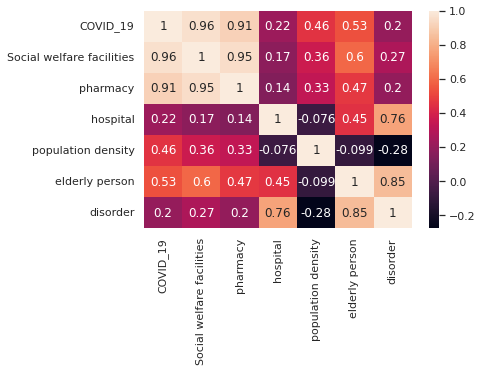

In [57]:
sns.heatmap(corr, annot = True)

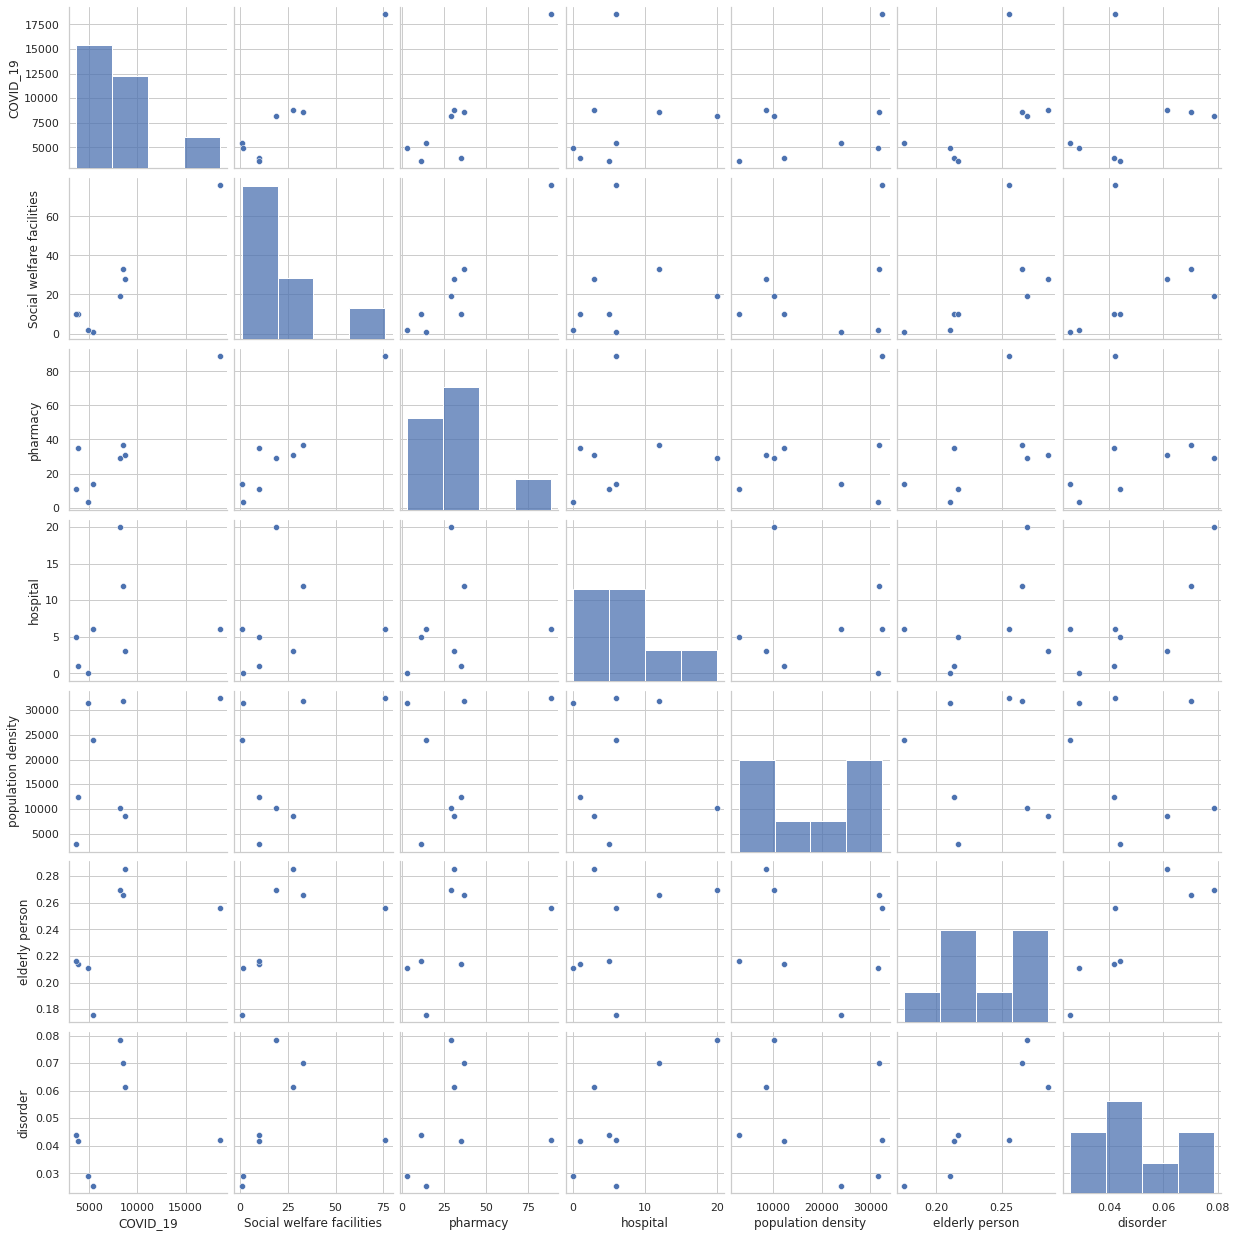

In [58]:
sns.set(style='whitegrid')
sns.pairplot(final_df)
plt.show()

### 다중 선형 회귀분석

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

r_square = lr.score(x_test, y_test)
print('R-square: ', r_square)
print('\n')

print('x 변수의 기울기: ', lr.coef_)
print('\n')

print('절편:', lr.intercept_)
print('\n')

R-square:  -1.8187542166851283


x 변수의 기울기:  [ 0.13411808 -0.54990496  0.55512883 -0.23819282  0.36580208 -0.11398309]


절편: -0.1351482318388502




In [67]:
import pandas as pd
import statsmodels.formula.api as sm
result = sm.ols(formula = 'COVID_19 ~ Social\swelfare\sfacilities +	pharmacy + hospital +	population\sdensity + elderly\sperson + disorder', data = x_scaled )

PatsyError: ignored